In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
#load the model
cnn = tf.keras.models.load_model("trained_model.keras")

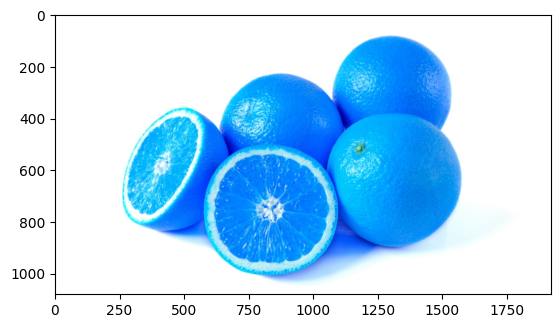

In [46]:
#visulation and performing Prediction on single image
import cv2
image_path = "test/orange/Image_3.jpg"
img = cv2.imread(image_path)
plt.imshow(img)

In [47]:
#testing Model
image = tf.keras.preprocessing.image.load_img(image_path,target_size = (64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [48]:
#print the class probabilities/predictions for each class
print(predictions)

[[3.5112453e-08 6.1526000e-11 2.9214983e-12 5.3019938e-10 5.4774482e-22
  6.7909161e-05 6.9872061e-05 1.0364689e-18 1.4587210e-09 2.0313014e-07
  2.1465546e-22 2.4663897e-18 1.8077574e-17 5.9004407e-12 1.4524902e-10
  2.7617045e-10 3.1889131e-16 1.3484319e-10 2.4380298e-16 1.1749481e-05
  1.5621496e-12 9.9946719e-01 3.4161177e-04 5.8099028e-09 2.3472117e-20
  1.3468629e-12 4.9732401e-12 6.0920629e-06 1.2542591e-14 3.0069974e-11
  5.3927960e-22 5.0123720e-07 3.4814253e-05 6.2521458e-08 5.3652778e-15
  1.2894773e-12]]


In [49]:
#test data preprocessing
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 360 files belonging to 36 classes.


In [50]:
#print the test data class names
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [51]:
#store the highest class probability into result_index
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

21


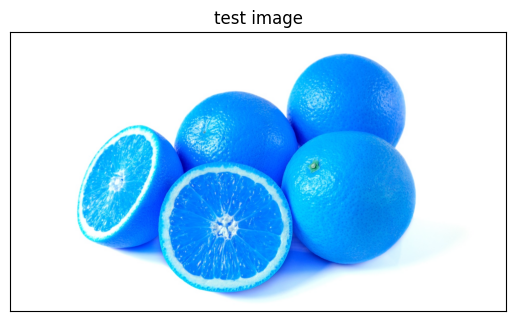

In [52]:
#again display the image
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
# do the prediction
print("it is a {}".format(test_set.class_names[result_index[0][0]]))

it is a orange
